<a href="https://colab.research.google.com/github/emallen07/Myanmar/blob/main/Myanmar_SAM2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Myanmar: Segement Anything Model (SAM) Proof of Concept**
The following code runs through a building segementation model in the town of Awrama, Myanmar (Burma), using imagery from post impact of Tropica Cyclone Mocha. A segementation model extracts footprints of features to be used for a variety os analysis such as classfications, damage, and flood. This proof of concept is to demonstrate a necessary step before and after hazards impact the population of Myanmar. Flood modelling and damage impact severity are two examples of what can be achieved using this model

In [3]:
%pip install segment-geospatial

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.6/56.6 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.3/75.3 kB 3.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.2/42.2 kB 3.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 kB 10.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.8/73.8 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 63.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 516.3/516.3 kB 33.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 508.9/508.9 kB 29.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 77.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.4/98.4 kB 8.3 M

In [4]:
import os
import leafmap
from samgeo import SamGeo, raster_to_vector, overlay_images
import rasterio

In [5]:
from google.colab import output
output.enable_custom_widget_manager()

Support for third party widgets will remain active for the duration of the session. To disable support:

In [5]:
from google.colab import drive
drive.mount('/content/drive')
# Step 1: Mount Google Drive

# Step 2: Define the file path
file_path = '/content/drive/MyDrive/579/Mocha/test.tif'

# Step 3: Read the TIFF file using Rasterio
import rasterio

with rasterio.open(file_path) as src:
    print("Metadata:", src.meta)  # Display metadata of the TIFF file
    data = src.read(1)  # Read the first band of the TIFF file
    print("First band shape:", data.shape)  # Display the shape of the first band


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Metadata: {'driver': 'GTiff', 'dtype': 'uint8', 'nodata': None, 'width': 1280, 'height': 1024, 'count': 4, 'crs': CRS.from_wkt('GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Latitude",NORTH],AXIS["Longitude",EAST],AUTHORITY["EPSG","4326"]]'), 'transform': Affine(5.557570220520294e-06, 0.0, 92.77156636954344,
       0.0, -5.557570220522161e-06, 20.594181147902507)}
First band shape: (1024, 1280)


In [6]:
import shutil

source_path = '/content/drive/MyDrive/579/Mocha/test.tif'
destination_path = 'test_image_mocha.tif'

shutil.copy(source_path, destination_path)
print(f"File copied to {destination_path}")

leafmap.download_file("https://example.com/path/to/file.tif", output="test_image_mocha.tif")


File copied to test_image_mocha.tif
test_image_mocha.tif already exists. Skip downloading. Set overwrite=True to overwrite.


'/content/test_image_mocha.tif'

In [8]:
m = leafmap.Map(height="600px")
m.add_basemap("SATELLITE")
m.add_raster("test_image_mocha.tif", layer_name="Image")
m.add_layer_manager()
m


Map(center=[20.5913355, 92.77512300000001], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_i…

Support for third party widgets will remain active for the duration of the session. To disable support:

In [9]:
from google.colab import output
output.disable_custom_widget_manager()

In [7]:
sam_kwargs = {
    "points_per_side": 32,
    "pred_iou_thresh": 0.86,
    "stability_score_thresh": 0.92,
    "crop_n_layers": 1,
    "crop_n_points_downscale_factor": 2,
    "min_mask_region_area": 80,
}

In [8]:
sam = SamGeo(
    model_type="vit_h",
    sam_kwargs=sam_kwargs,
)

In [9]:
sam.generate("test_image_mocha.tif", output="test_mask_mocha.tif", foreground=True)

In [10]:
raster_to_vector("test_image_mocha.tif", output="test_mask_mocha.shp")

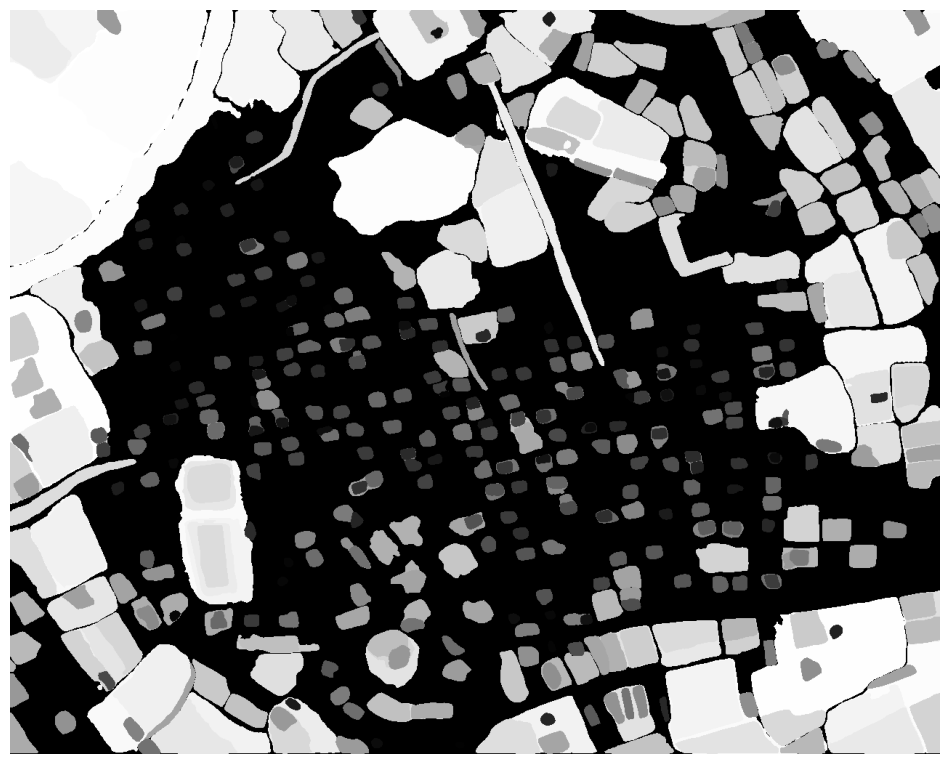

In [11]:
sam.show_masks(cmap="binary_r")

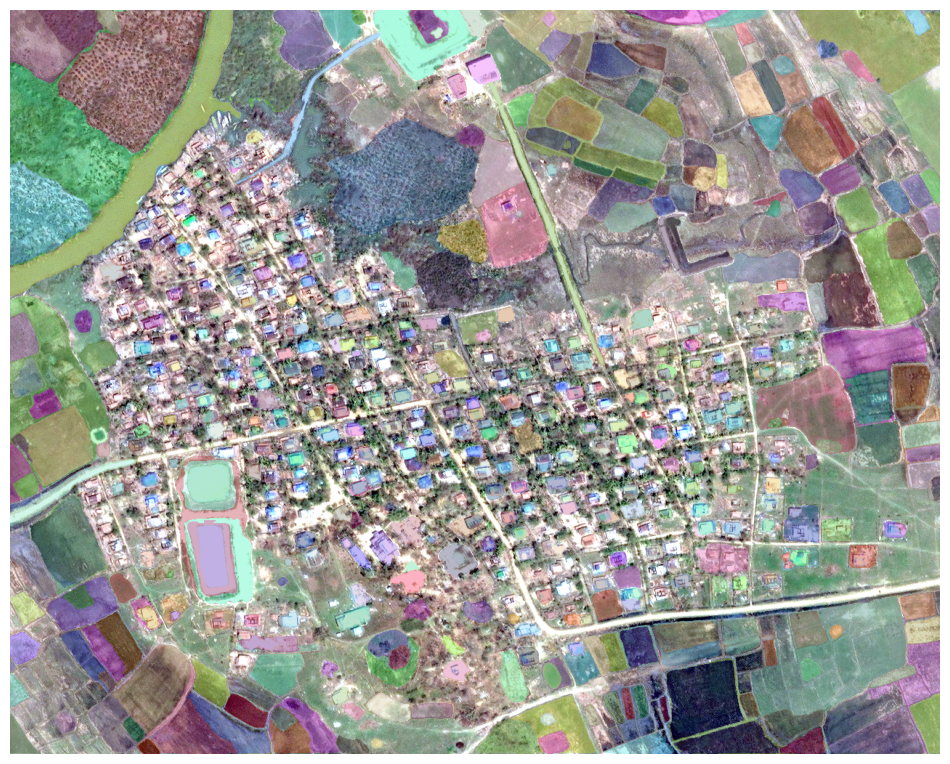

In [12]:
sam.show_anns(axis="off", opacity=1, output="test_annotation_mocha.tif")

In [ ]:
leafmap.image_comparison(
    "test_image_mocha.tif",
    "test_annotation_mocha.tif",
    label1="Image",
    label2="Segmentation",
)

In [13]:
overlay_images("test_image_mocha.tif", "test_annotation_mocha.tif", backend="TkAgg")

The TkAgg backend is not supported in Google Colab. The overlay_images function will not work on Colab.


In [15]:
m.add_raster("test_mask_mocha.tif", layer_name="Mask", nodata=0)
m.add_raster("test_annotation_mocha.tif", layer_name="Annotation")
m

NameError: name 'm' is not defined

In [16]:
m.add_vector("test_mask_mocha.shp", layer_name="Vector", info_mode=None)

NameError: name 'm' is not defined